# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow


In [2]:
!pip install matplotlib

In [3]:
!pip install opencv-python

In [4]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
altair                       5.0.1
anyio                        4.2.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.11.0
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       4.1.0
blinker                      1.4
Bottleneck                   1.3.5
brotlipy                     0.7.0
cachetools                   4.2.2
certifi                      2024.2.2
cffi                         1.15.1
charset-normalizer           2.0.4
click                        8.0.4
colorama                     0.4.6
comm                         0.1.2
contourpy                    1.2.0
cryptography                 41.0.2
cycler                       0.12.1
deb

In [5]:
import tensorflow as tf
import os

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [8]:
import cv2
import imghdr

C:\Users\Dhayanithi\AppData\Local\Temp\ipykernel_3608\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [9]:
data_dir = 'data'

In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [11]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

# 3. Load Data

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 242 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
batch = data_iterator.next()

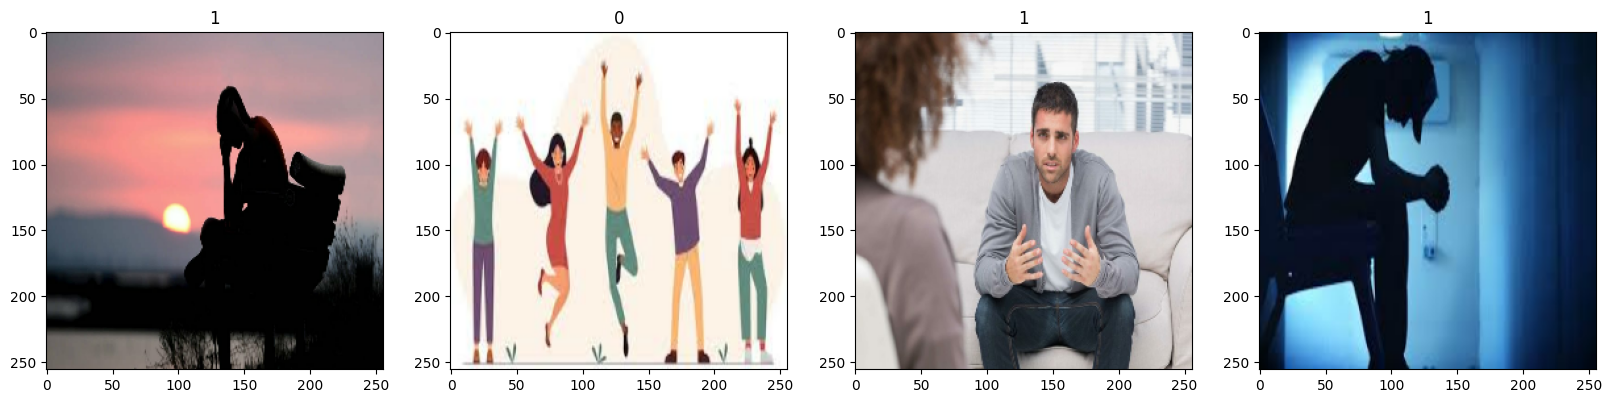

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [17]:
data = data.map(lambda x,y: (x/255, y))

In [18]:
data.as_numpy_iterator().next()

(array([[[[0.00784314, 0.02352941, 0.05882353],
          [0.00582108, 0.02454044, 0.05882353],
          [0.        , 0.02745098, 0.05882353],
          ...,
          [0.00392157, 0.06666667, 0.12941177],
          [0.00392157, 0.06666667, 0.12941177],
          [0.00392157, 0.06666667, 0.12941177]],
 
         [[0.00784314, 0.02352941, 0.05882353],
          [0.00582108, 0.02454044, 0.05882353],
          [0.        , 0.02745098, 0.05882353],
          ...,
          [0.00392157, 0.06666667, 0.12941177],
          [0.00392157, 0.06666667, 0.12941177],
          [0.00392157, 0.06666667, 0.12941177]],
 
         [[0.0067402 , 0.02408088, 0.05882353],
          [0.00500249, 0.02494974, 0.05882353],
          [0.        , 0.02745098, 0.05882353],
          ...,
          [0.00392157, 0.06666667, 0.12941177],
          [0.00392157, 0.06666667, 0.12941177],
          [0.00392157, 0.06666667, 0.12941177]],
 
         ...,
 
         [[0.00392157, 0.01960784, 0.02463235],
          [0.00392

# 5. Split Data

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [20]:
train_size

5

In [21]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [22]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Dhayanithi\anaconda3\envs\myenv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [26]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [28]:

logdir='logs'

In [29]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [30]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 366ms/step - accuracy: 0.4396 - loss: 1.1271 - val_accuracy: 0.6250 - val_loss: 0.6858
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 325ms/step - accuracy: 0.5123 - loss: 0.7385 - val_accuracy: 0.5000 - val_loss: 0.6926
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 334ms/step - accuracy: 0.5705 - loss: 0.6536 - val_accuracy: 0.7188 - val_loss: 0.6820
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 335ms/step - accuracy: 0.7609 - loss: 0.6121 - val_accuracy: 0.7188 - val_loss: 0.6760
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 340ms/step - accuracy: 0.8710 - loss: 0.4849 - val_accuracy: 0.7188 - val_loss: 0.5842
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 326ms/step - accuracy: 0.8536 - loss: 0.3256 - val_accuracy: 0.8125 - val_loss: 0.3600
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 333ms/step - accuracy: 0.8339 - loss: 0.3563 - val_accuracy: 0.8750 - val_loss: 0.3291
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 344ms/step - accuracy: 0.9105 - loss: 0.3367 - val_accuracy: 0.9375 - val_loss:

# 8. Plot Performance

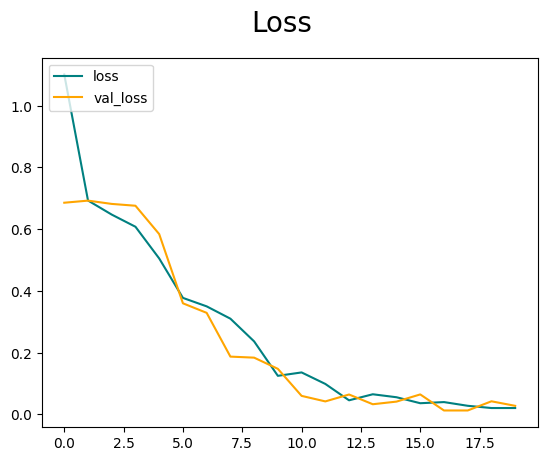

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

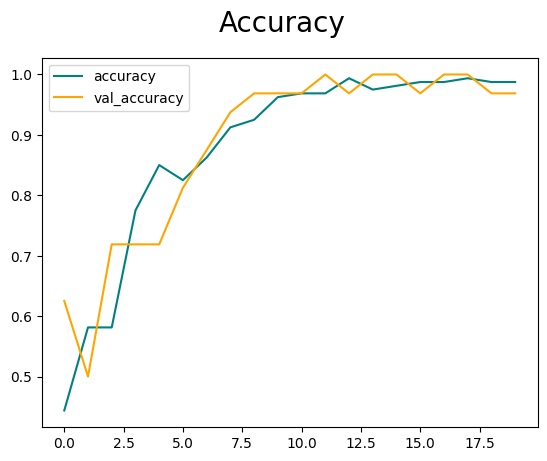

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [33]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [34]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [35]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [36]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)
